# 의사결정나무(Decison Tree)

#### **사후 가지치기**
: 나무가 완성된 후에 하단 노드부터 유의미하지 않다고 판단되는 Subtree를 끝노드로 변환시키는 방법    

#### [Cost Complexity Pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html)    
$R_\alpha(T) = R(T) + \alpha\vert T \vert$

  - 위의 비용복잡도(Cost complexity) 식을 최소화 시키는 과정(CCP)
  - Weakest link pruning이라고도 한다.
  - 가지가 있을 때와 처낼 때 불순도의 차이가 거의 없는 가지(Weakest Link)를 가지치기하는 메커니즘
  - 모든 Subtree를 고려하진 않아 Local Minima에 빠질 수 있다.

    
참고 : https://zephyrus1111.tistory.com/131


### 1. 데이터 로드 및 전처리

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib
#한글꺠짐 방지
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [2]:
data=pd.read_csv("./data/class_balance.csv",encoding="EUC-KR")

In [3]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X466,X467,X468,X469,X470,X471,X472,X473,X474,Y
0,0.457896,0.530189,0.276976,0.359864,0.193059,0.322190,0.706897,0.553781,0.653894,0.375204,...,0.246376,0.711806,0.008532,0.013672,0.008467,0.402240,0.238811,0.274876,0.210238,-1
1,0.607100,0.341478,0.518992,0.395300,0.042071,0.469654,0.750000,0.542031,0.447466,0.189233,...,0.523785,0.760417,0.030930,0.033203,0.029759,0.210356,0.309339,0.328358,0.439175,-1
2,0.360781,0.369653,0.341039,0.021697,0.181737,0.528684,0.491379,0.516722,0.300371,0.376835,...,0.185769,0.659722,0.005333,0.003906,0.005311,0.381877,0.208171,0.208955,0.155761,-1
3,0.460910,0.413500,0.535685,0.302794,0.242326,0.408966,0.646552,0.561615,0.415328,0.313214,...,0.246376,0.000000,1.000000,1.000000,1.000000,0.381877,0.208171,0.208955,0.155761,-1
4,0.263068,0.279821,0.535685,0.302794,0.242326,0.408966,0.646552,0.638747,0.660074,0.520392,...,0.110711,0.517361,0.023677,0.022461,0.023447,0.608414,0.212062,0.268657,0.092827,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0.360022,0.396033,0.382803,0.070771,0.143308,0.920884,0.586207,0.636336,0.337454,0.432300,...,0.000000,0.597222,0.016212,0.013672,0.015997,0.045307,0.147860,0.171642,0.000000,1
250,0.508628,0.437628,0.192378,0.061866,0.168425,0.481919,0.715517,0.270563,0.407911,0.336052,...,0.132582,0.975694,0.017065,0.015625,0.016114,0.543689,0.227626,0.320896,0.111165,1
251,0.275930,0.364365,0.302236,0.376615,0.485135,0.627270,0.594828,0.435673,0.420272,0.367047,...,0.246376,0.586806,0.008532,0.015625,0.008613,0.343042,0.151751,0.164179,0.143012,1
252,0.785179,0.271804,0.400189,0.457851,0.229526,0.244320,0.396552,0.875565,0.110012,0.337684,...,0.221768,0.767361,0.024317,0.019531,0.023461,0.509709,0.398833,0.440299,0.185945,1


In [4]:
#X,Y 분할
Y=data["Y"].copy()
X=data.drop("Y",axis=1)
X.head(3)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=22,shuffle =True)

[[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)]  
**sklearn.model_selection.train_test_split**
- **test_size** : float or int, default = 0.25, 정수값일시 test사이즈로 설정하고 싶은 샘플 수 입력
- **train_size** : float or int, default = None
- **random_state** : int, default = None, 랜덤 seed값 설정, 같은 seed 내에선 동일결과 추출 
- **shuffle** : bool, default = True, 데이터셋 무작위 추출, 시계열 데이터와 같이 순차적 추출이 필요한 경우엔 Shuffle = False!
- **stratify** : array-like, default = None, True일시 계층적 샘플링 진행 ([참고](https://www.investopedia.com/terms/stratified_random_sampling.asp))

### 2. 평가 지표 함수

![Confusion Matrix](https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg)

###### 이미지 출처 : https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html

In [5]:
# 평가 지표 출력 함수
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix

def print_all_reg(Y_test,pred):
    # Specificity를 구하기 위해 confusion matrix를 이용
    cm1 = confusion_matrix(Y_test,pred)
    specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    
    #결과 검사
    #recall = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    #pre = cm1[1,1]/(cm1[1,1]+cm1[0,1])

    G_mean = recall_score(Y_test,pred) * specificity1
    
    print("model의 recall 값은 {:.3f}".format(recall_score(Y_test,pred)))
    print("model의 2종 오류 확률 값은 {:.3f}".format(1-recall_score(Y_test,pred)))
    print("model의 Specificity 값은 {:.3f}".format(specificity1))
    print("model의 1종 오류 확률 값은 {:.3f}".format(1-specificity1))
    print("model의 precision 값은 {:.3f}".format(precision_score(Y_test,pred)))
    print("model의 f1_score 값은 {:.3f}".format(f1_score(Y_test,pred)))
    print("model의 G-mean 값은 {:.3f}".format(np.sqrt(G_mean)))
    print("model의 accuracy 값은 {:.3f}".format(accuracy_score(Y_test,pred)))


### 3. 모델 학습 및 예측

In [6]:
from sklearn.tree import DecisionTreeClassifier

ccp_alpha_list = list(np.arange(0.25,0,-0.001)) # 0.25부터 0까지 0.001씩 감소
ccp_alpha_list2 = list(np.arange(0,0.25,0.001)) # 0부터 0.25까지 0.001씩 증가

#ccp_alpha_list = np.logspace(-10, 0, num=200)
#ccp_alpha_list2 = np.logspace(-10, 0, num=200)
train_scores =[]
test_scores =[]
for alpha in ccp_alpha_list:
    clf = DecisionTreeClassifier(ccp_alpha= alpha) # ccp_alpha 값보다 작으면서 비용복잡도가 가장 큰 Subtree
    clf.fit(X_train,Y_train) # 학습용 데이터로 모델 학습
    
    preds_train = clf.predict(X_train) # 모델 예측
    preds = clf.predict(X_test)
    
    train_scores.append(1-accuracy_score(Y_train,preds_train)) # 학습용 데이터 오분류율
    test_scores.append(1-accuracy_score(Y_test,preds)) # 테스트 데이터 오분류율

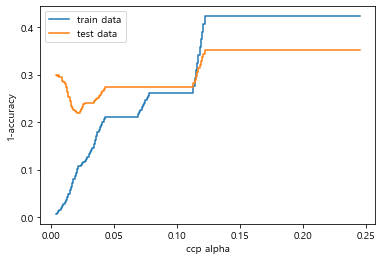

In [9]:
# ccp-alpha 값을 변화시키면서 얻은 모델 결과 시각화

fig, ax = plt.subplots()
ax.set_xlabel("ccp alpha")
ax.set_ylabel("1-accuracy")
#ax.set_title("나무 복잡도 증가에 따른 오분류율 그래프")
ax.plot(ccp_alpha_list, pd.Series(train_scores).rolling(10,center =True).mean(),  label="train data", drawstyle="steps-post")
ax.plot(ccp_alpha_list, pd.Series(test_scores).rolling(10,center=True).mean(),  label="test data", drawstyle="steps-post")

#ax.plot(ccp_alpha_list, train_scores, drawstyle="steps-post")
#ax.plot(ccp_alpha_list, test_scores, drawstyle="steps-post")

ax.legend()
#plt.xlim(0.7)
plt.show()
plt.close('all')

- 테스트 데이터에서 오분류율이 가장 낮은 alpha = 0.02를 최적값으로 선택!

In [ ]:
# 최적 ccp-alpha로 모델 학습

alpha = 0.02
clf = DecisionTreeClassifier(ccp_alpha= alpha)  
clf.fit(X_train,Y_train)
preds = clf.predict(X_test)
preds_train = clf.predict(X_train) # 훈련용 X 데이터셋으로 예측값 생성
print_all_reg(Y_train,preds_train) # 실제 y값과 예측값을 비교하여 성능지표 출력
print(" ")
print_all_reg(Y_test,preds)